## 一元一次方程：y = a*x + b

### 1.读取数据

In [1]:
import warnings
warnings.filterwarnings("ignore") # 忽略警告信息，不影响代码执行

import pandas as pd
df = pd.read_excel('datasets/金融行业收入表.xlsx')
df.head()

,工龄,薪水
0,0.0,9534
1,0.1,11667
2,0.2,11015
3,0.3,10347
4,0.3,11110


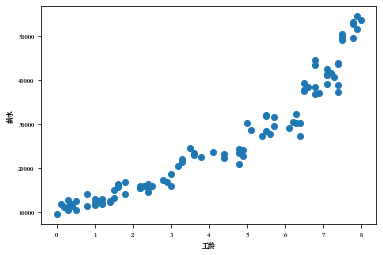

In [10]:
x = df[['工龄']] # 自变量，二维结构
y = df['薪水'] # 因变量，一维结构

plt.rc('font', family='Songti SC', size=7)  # 支持中文输出

# 绘制散点图
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

### 3．模型搭建

In [11]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

### 4．模型可视化

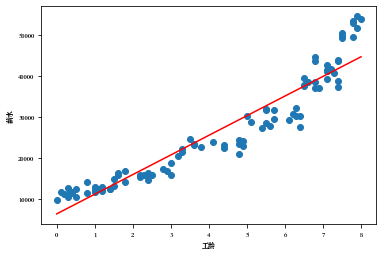

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, regr.predict(x), color='red')
plt.xlabel('工龄')
plt.ylabel('薪水')
plt.show()

### 5.线性回归方程构造

In [13]:
print('系数a：' + str(regr.coef_[0]))
print('截距b：' + str(regr.intercept_))

系数a：4792.243152511083
截距b：6269.706619146589


线性回归方程：y = 4792.2*x + 6269.7

### 6.模型的编程评估

In [14]:
import statsmodels.api as sm
x2 = sm.add_constant(x)
est = sm.OLS(y, x2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     930.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           7.77e-52
Time:                        21:27:04   Log-Likelihood:                -972.23
No. Observations:                 100   AIC:                             1948.
Df Residuals:                      98   BIC:                             1954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6269.7066    767.971      8.164      0.000    4745.694    7793.719
工龄          4792.2432    157.068     30.511      0.000    4480.546    5103.940
==============================================================================
Omnibus:                        1.888   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.389   Jarque-Bera (JB):                1.518
Skew:                           0.298   Prob(JB):                        0.468
Kurtosis:                       3.091   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(y, regr.predict(x))
print(r2)

0.9047522073969682
